<a href="https://colab.research.google.com/github/Bajbalemonika-05/Sentiment-Analysis-using-ML-and-DL/blob/main/Sentiment_analysis_using_ML_and_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing important libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Embedding,Flatten

# preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence


**Loading dataset**

In [ ]:
df=pd.read_csv('/content/review.csv',encoding='latin-1')
df

,Unnamed: 0,review,sentiment
0,0,Not sure who was more lost - the flat characte...,0
1,1,Attempting artiness with black & white and cle...,0
2,2,Very little music or anything to speak of.,0
3,3,The best scene in the movie was when Gerardo i...,1
4,4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...,...
994,994,I just got bored watching Jessice Lange take h...,0
995,995,"Unfortunately, any virtue in this film's produ...",0
996,996,"In a word, it is embarrassing.",0
997,997,Exceptionally bad!,0


**EDA**

In [ ]:
df.shape


(999, 3)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,500
0,499


In [ ]:
positive = ' '.join(df[df['sentiment']==1]['review'])
negative = ' '.join(df[df['sentiment']==0]['review'])

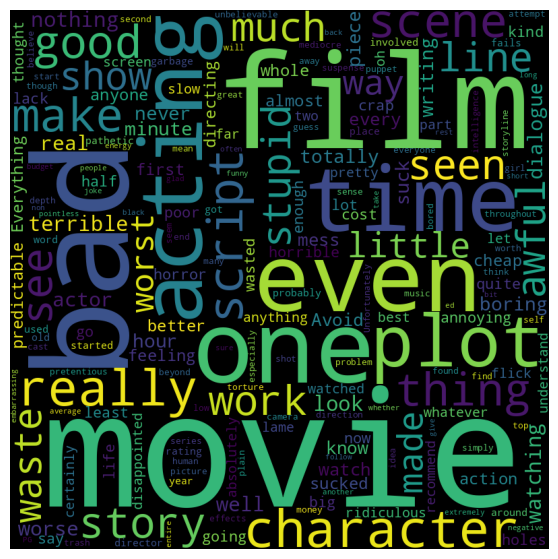

In [ ]:
 wc = WordCloud(width = 800, height = 800,
              background_color ='black',
              min_font_size = 10)

wc.generate(negative)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

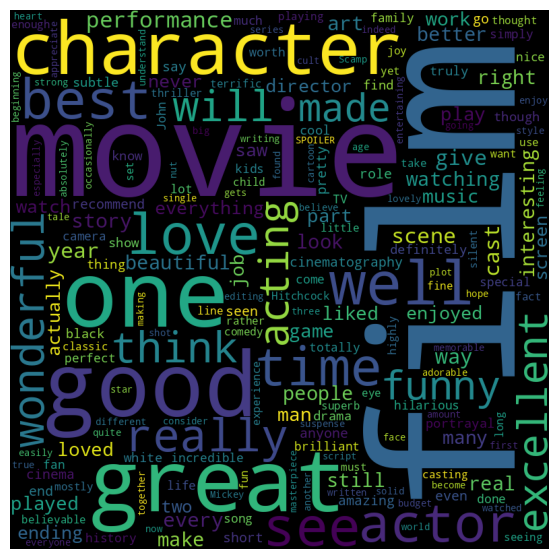

In [ ]:
wc = WordCloud(width = 800, height = 800,
              background_color ='black',
              min_font_size = 10)

wc.generate(positive)

plt.figure(figsize=(7,7))
plt.imshow(wc)
plt.axis("off")
plt.show()

Splitting data into x and Y

In [ ]:
# feature target split
x = df['review']
y = df['sentiment']

In [ ]:
x

,review
0,Not sure who was more lost - the flat characte...
1,Attempting artiness with black & white and cle...
2,Very little music or anything to speak of.
3,The best scene in the movie was when Gerardo i...
4,"The rest of the movie lacks art, charm, meanin..."
...,...
994,I just got bored watching Jessice Lange take h...
995,"Unfortunately, any virtue in this film's produ..."
996,"In a word, it is embarrassing."
997,Exceptionally bad!


In [ ]:
y

,sentiment
0,0
1,0
2,0
3,1
4,0
...,...
994,0
995,0
996,0
997,0


In [ ]:
from operator import le
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)
y

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

**Splitting data into  traning and testing **

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Now we have to do some preprocessing like Tokenization, Remove stopwords and do vectorization

In [ ]:
#CountVectorization
from sklearn.feature_extraction.text import CountVectorizer # import CountVectorizer from the correct module
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
cv=CountVectorizer(stop_words="english")
x_train_cv=cv.fit_transform(x_train)
x_test_cv=cv.transform(x_test)

**Appling ML model (decisionTree)**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
dt=DecisionTreeClassifier()
dt.fit(x_train_cv,y_train)

DecisionTreeClassifier()

you are not able to print after converting into count vectoriser But if u reallt want to see, u can convert it into an array

In [ ]:
x_train_cv.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
y_pred = dt.predict(x_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.64      0.69       102
           1       0.67      0.78      0.72        98

    accuracy                           0.70       200
   macro avg       0.71      0.71      0.70       200
weighted avg       0.71      0.70      0.70       200



from above report we can see that we are not getting that much of accurancy from the ML model hence we try for a DL model

**<h2>Using DL approach**

In [ ]:
# Deep Learning Approach
# Keras tokenizatiion
tok = Tokenizer()
tok.fit_on_texts(x_train)

In [ ]:
vocabulary = tok.index_word
print(vocabulary)

{1: 'the', 2: 'and', 3: 'a', 4: 'of', 5: 'is', 6: 'i', 7: 'this', 8: 'it', 9: 'to', 10: 'in', 11: 'was', 12: 'movie', 13: 'film', 14: 'that', 15: 'for', 16: 'as', 17: 'but', 18: 'with', 19: 'are', 20: 'on', 21: 'one', 22: "it's", 23: 'you', 24: 'bad', 25: 'just', 26: 'not', 27: 'all', 28: 'so', 29: 'an', 30: 'at', 31: 'good', 32: 'about', 33: 'very', 34: 'like', 35: 'there', 36: 'out', 37: 'from', 38: 'by', 39: 'have', 40: 'even', 41: 'his', 42: 'acting', 43: 'be', 44: 'who', 45: 'really', 46: 'if', 47: 'were', 48: 'time', 49: 'he', 50: 'great', 51: 'characters', 52: 'has', 53: 'well', 54: 'or', 55: 'more', 56: 'how', 57: 'my', 58: 'see', 59: 'some', 60: 'when', 61: 'movies', 62: 'story', 63: '10', 64: 'can', 65: 'no', 66: 'best', 67: 'than', 68: "don't", 69: 'made', 70: 'plot', 71: 'most', 72: 'her', 73: 'they', 74: 'character', 75: "didn't", 76: 'its', 77: 'think', 78: 'only', 79: 'do', 80: 'ever', 81: 'seen', 82: 'will', 83: 'better', 84: 'wonderful', 85: 'work', 86: 'other', 87: 'f

In [ ]:
length=len(vocabulary)
length

2686

In [ ]:
# text to sequence
train_sequence = tok.texts_to_sequences(x_train)
print(train_sequence)

[[1, 424, 214, 1013, 9, 85, 18, 1, 187, 19, 188, 1014, 145, 2, 425], [21, 4, 1, 71, 189, 426, 61, 6, 39, 80, 81], [22, 3, 1015, 12, 17, 33, 31], [17, 427, 8, 11, 14, 602, 168, 28, 103, 8, 75, 1016, 9, 603, 190, 15, 428], [338, 1017, 63, 1018, 1019, 429, 1, 121, 5, 28, 24, 14, 40, 604, 4, 1, 114, 605, 72, 606, 36, 4, 1, 121], [1020, 1021, 5, 16, 80, 3, 50, 1022, 15, 339, 1, 62, 1023, 430, 9, 76, 273, 1024, 30, 29, 1025, 1026, 17, 8, 340, 1, 1027, 1028, 4, 1029, 215, 2, 274, 275, 276, 341], [6, 64, 77, 4, 65, 86, 13, 216, 431, 1030, 607, 1031, 122, 86, 432], [1, 277, 51, 608, 27, 14, 278, 2, 6, 342, 279, 1032, 44, 11, 44], [8, 5, 3, 45, 31, 121, 9, 104], [8, 609, 3, 1033, 280, 433, 281, 4, 1, 343, 2, 1034, 4, 1, 51, 610], [1035, 1036, 52, 1037, 146], [27, 10, 27, 3, 145, 611, 13, 37, 1038, 1039, 1040, 3, 1041, 114], [22, 33, 282], [6, 612, 147, 24, 1042, 32, 87, 214, 131, 10, 88, 6, 45, 34, 1, 344, 17, 7, 13, 5, 28, 24, 6, 68, 238, 15, 21, 239, 14, 115, 105, 39, 148, 613, 4, 8], [6, 1043

In [ ]:
# length of alll documents
doc_length = []
for doc in train_sequence:
  doc_length.append(len(doc))

In [ ]:
max(doc_length)

69

In [ ]:
#99% quantile
#95% document length is less than or equal to 51
np.quantile(doc_length,0.9)

27.0

In [ ]:
#99% quantile
#95% document length is less than or equal to 51
np.quantile(doc_length,0.99)

45.0

In [ ]:
max_length = 45

In [ ]:
train_matrix= sequence.pad_sequences(train_sequence,maxlen=max_length)
train_matrix

array([[  0,   0,   0, ..., 145,   2, 425],
       [  0,   0,   0, ...,  39,  80,  81],
       [  0,   0,   0, ...,  17,  33,  31],
       ...,
       [  0,   0,   0, ...,   3,  95,  12],
       [  0,   0,   0, ...,  20,   2,  20],
       [  0,   0,   0, ...,  22, 540, 953]], dtype=int32)

Same we will perform for testing data

In [ ]:
# Testing data
test_sequence = tok.texts_to_sequences(x_test)
test_matrix = sequence.pad_sequences(test_sequence,maxlen=max_length)
test_matrix

array([[   0,    0,    0, ...,    3,  492,   89],
       [   0,    0,    0, ...,    9,   91,  101],
       [   0,    0,    0, ...,   40,   31,   15],
       ...,
       [   0,    0,    0, ...,   49,   80,   69],
       [   0,    0,    0, ...,   19,  260, 2102],
       [   0,    0,    0, ..., 2094,  111,  156]], dtype=int32)

**Using DL algorithm**

In [ ]:
# model
model = Sequential()
model.add(Embedding(input_dim=length+1, # vocabulary length, +1 -> 0 tokens
                    input_length=max_length,  # max length of document -> 51
                    output_dim=100,           # hyperparameter -> vector length of each token
                    mask_zero=True))          # do not learn for 0 token
# Add a Flatten layer or GlobalAveragePooling1D to reduce dimensionality
model.add(Flatten()) # Flatten layer converts the multi-dimensional output to 1D
# Alternatively, you can use GlobalAveragePooling1D
# model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.compile(optimizer="adam",loss="binary_crossentropy")
model.fit(train_matrix,y_train,epochs=20,batch_size=32)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/layer.py:915: UserWarning: Layer 'flatten' (of type Flatten) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.6956
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6861
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.6579
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.5360
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2432
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0518
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0183
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0077
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0033
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0024
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0021
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0017
Epoch 13/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Epoch 14/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0012
Epoch 15/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 8.3262e-04
Epoch 16/20
25/25 ━━

In [ ]:
# prediction
y_pred = model.predict(test_matrix)
y_pred = np.where(y_pred >= 0.5, 1, 0)
print(classification_report(y_test,y_pred))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
              precision    recall  f1-score   support

           0       0.68      0.70      0.69       102
           1       0.67      0.65      0.66        98

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.68      0.67       200



Using TF-IDF vectorizer

In [ ]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words="english")
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [ ]:
dt2 = DecisionTreeClassifier()
dt2.fit(x_train_tfidf,y_train)

In [ ]:
y_pred = dt2.predict(x_test_tfidf)

print(classification_report(y_test,y_pred))

from above all the models that we used TF-IDF gives high accurancy in comparison